# **Linear Regression**

## Theory of Multivariable Linear Regression

**Multivariable linear regression** is an extension of simple linear regression that uses multiple independent variables to predict a dependent variable. This method helps to understand how several factors collectively influence a single outcome.

### Equation of Multivariable Linear Regression

The equation for multivariable linear regression can be expressed as follows:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon
$$

- \(y\): the dependent variable (the value we are trying to predict, e.g., **MEDV**).
- \(x_1, x_2, \ldots, x_n\): the independent variables (the features used to predict \(y\)).
- \(\beta_0\): the intercept, representing the value of \(y\) when all \(x\) values are 0.
- \(\beta_1, \beta_2, \ldots, \beta_n\): the regression coefficients, representing the expected change in \(y\) for each unit change in the corresponding \(x\).
- \(\epsilon\): the random error (or residual), which captures the variation in \(y\) that cannot be explained by the independent variables.

### Assumptions of Multivariable Linear Regression

1. **Linearity**: The relationship between the independent variables and the dependent variable is linear.
2. **Independence**: The residuals (errors) are independent of each other.
3. **Homoscedasticity**: The variance of the residuals is constant across all levels of the independent variables.
4. **Normality**: The residuals follow a normal distribution.


### Finding Parameters Using Gradient Descent

To perform linear regression, we need to estimate the parameters (\(\beta_0, \beta_1, \ldots, \beta_n\)) of the linear equation. One common method to find these parameters is **gradient descent**.

1. **Initialize Parameters**: We start by initializing the parameters (coefficients) to small random values or zeros.

2. **Hypothesis Function**: The hypothesis function predicts the output \(y\) for given input features \(x\):

   $$
   h_\beta(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n
   $$

3. **Cost Function**: We define a cost function that measures how well the hypothesis function predicts the actual output. The most commonly used cost function is the Mean Squared Error (MSE):

   $$
   J(\beta) = \frac{1}{m} \sum_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)})^2
   $$

   where \(m\) is the number of training examples.

4. **Gradient Descent Algorithm**: The goal of gradient descent is to minimize the cost function \(J(\beta)\) by updating the parameters iteratively. The update rule for each parameter is given by:

   $$
   \beta_j := \beta_j - \alpha \frac{\partial J(\beta)}{\partial \beta_j}
   $$

   where \(\alpha\) is the learning rate, which determines the size of the steps taken towards the minimum.

5. **Iterate**: We repeat the process of calculating the gradients and updating the parameters until the cost function converges to a minimum value or reaches a predefined number of iterations.

6. **Result**: After applying gradient descent, we obtain the optimal parameters \(\beta\) that minimize the cost function, allowing us to make accurate predictions using the linear regression model.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
data = pd.read_csv("/kaggle/input/housing2/BostonHousing.csv")

In [12]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
target = data["medv"]
x = data.drop(columns = ["medv"])

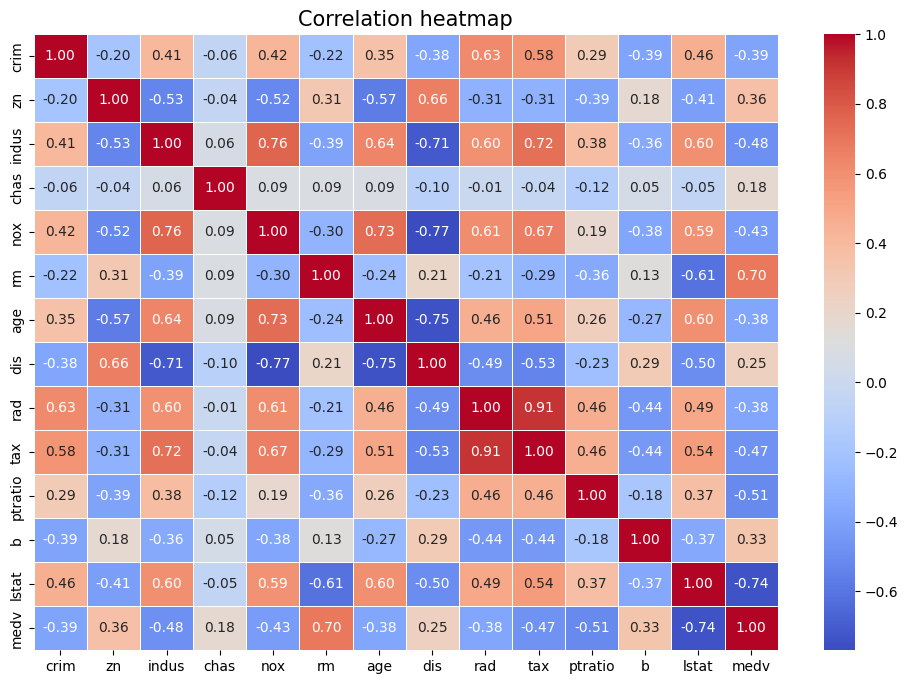

In [37]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation heatmap', fontsize=15)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(x,target,test_size=0.2,shuffle=True)

In [29]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred = linear_regressor.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {linear_regressor.coef_}")
print(f"Intercept: {linear_regressor.intercept_}")

Mean Squared Error: 20.642411430536026
Coefficients: [-1.02466778e-01  4.69643715e-02  4.40373010e-02  2.87094600e+00
 -2.17713229e+01  3.91507266e+00  9.16717943e-03 -1.51641565e+00
  3.19401048e-01 -1.22614644e-02 -1.03648677e+00  1.01873665e-02
 -5.18606003e-01]
Intercept: 38.32771896916259
